# Movie Lens Dataset 

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [29]:
ratings = pd.read_csv('/Users/fatemeh/Documents/MDDB/System Development for Marketing/MovieLens(The Smallest)/ml-latest-small/ratings.csv')
movies = pd.read_csv('/Users/fatemeh/Documents/MDDB/System Development for Marketing/MovieLens(The Smallest)/ml-latest-small/movies.csv')

## Data Cleaning

### Inspecting Data

In [30]:
print(ratings.head())
print(movies.head())

   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


In [31]:
ratings.info()
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


### Handling Missing Values

In [32]:
# Check for missing values (NaN or null values) 
print(ratings.isnull().sum())
print(movies.isnull().sum())

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64
movieId    0
title      0
genres     0
dtype: int64


### Merge Datasets

In [33]:
df = pd.merge(ratings, movies, on='movieId')
print(df.head())

   userId  movieId  rating   timestamp             title  \
0       1        1     4.0   964982703  Toy Story (1995)   
1       5        1     4.0   847434962  Toy Story (1995)   
2       7        1     4.5  1106635946  Toy Story (1995)   
3      15        1     2.5  1510577970  Toy Story (1995)   
4      17        1     4.5  1305696483  Toy Story (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1  Adventure|Animation|Children|Comedy|Fantasy  
2  Adventure|Animation|Children|Comedy|Fantasy  
3  Adventure|Animation|Children|Comedy|Fantasy  
4  Adventure|Animation|Children|Comedy|Fantasy  


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
 4   title      100836 non-null  object 
 5   genres     100836 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 5.4+ MB


### Drop Unused Columns

In [35]:
df.drop(['timestamp'], axis=1, inplace=True)    #Drop unused column

## EDA

### Descriptive Statistics

In [36]:
df.describe()

,userId,movieId,rating
count,100836.000000,100836.000000,100836.000000
mean,326.127564,19435.295718,3.501557
std,182.618491,35530.987199,1.042529
min,1.000000,1.000000,0.500000
25%,177.000000,1199.000000,3.000000
50%,325.000000,2991.000000,3.500000
75%,477.000000,8122.000000,4.000000
max,610.000000,193609.000000,5.000000


In [37]:
# It counts the occurrences of each genre in the 'genres' column using value_counts() method.
df['genres'].value_counts()

Comedy                                                      7196
Drama                                                       6291
Comedy|Romance                                              3967
Comedy|Drama|Romance                                        3000
Comedy|Drama                                                2851
                                                            ... 
Action|Adventure|Animation|Comedy|Fantasy|Mystery|Sci-Fi       1
Children|Fantasy|Musical|Romance                               1
Comedy|Crime|Drama|Horror                                      1
Comedy|Sci-Fi|War                                              1
Action|Crime|Drama|Sci-Fi                                      1
Name: genres, Length: 951, dtype: int64

In [38]:
#Understand the data
df.describe(include='all')

,userId,movieId,rating,title,genres
count,100836.000000,100836.000000,100836.000000,100836,100836
unique,NaN,NaN,NaN,9719,951
top,NaN,NaN,NaN,Forrest Gump (1994),Comedy
freq,NaN,NaN,NaN,329,7196
mean,326.127564,19435.295718,3.501557,NaN,NaN
std,182.618491,35530.987199,1.042529,NaN,NaN
min,1.000000,1.000000,0.500000,NaN,NaN
25%,177.000000,1199.000000,3.000000,NaN,NaN
50%,325.000000,2991.000000,3.500000,NaN,NaN
75%,477.000000,8122.000000,4.000000,NaN,NaN


In [51]:
df['rating'].describe()

count    9.665500e+04
mean    -2.493571e-16
std      1.000005e+00
min     -2.350778e+00
25%     -6.850196e-01
50%      4.254861e-01
75%      4.254861e-01
max      1.535992e+00
Name: rating, dtype: float64

### Visualizing the Distribution

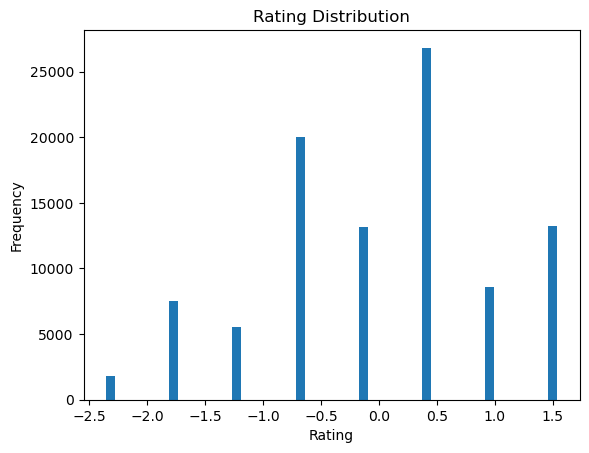

In [53]:

plt.hist(df['rating'], bins=50)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


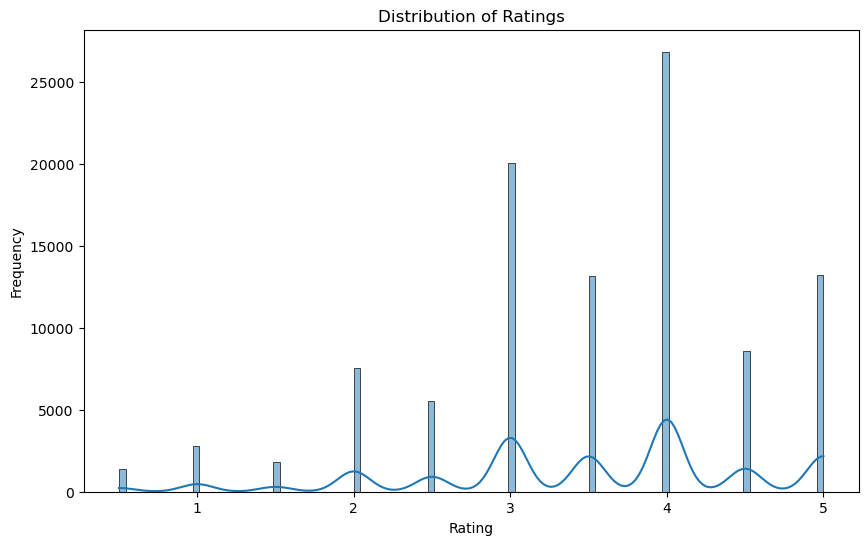

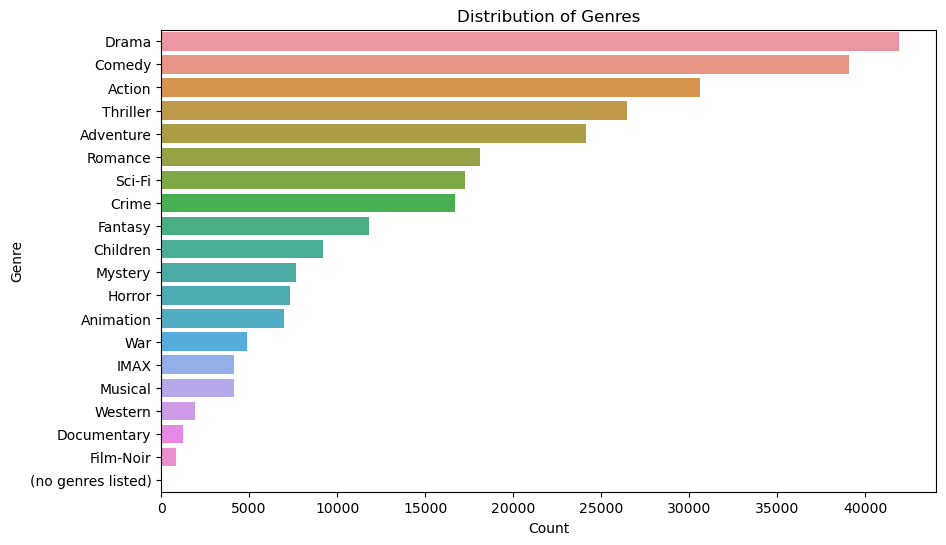

In [39]:
# Ratings distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['rating'], kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Genres distribution
plt.figure(figsize=(10, 6))
genres = df['genres'].str.split('|').explode()
sns.countplot(y=genres, order=genres.value_counts().index)
plt.title('Distribution of Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

### Detecting and Handling Outliers

In [40]:
# Detecting outliers in 'rating' using IQR
def count_outliers(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data.loc[(data[feature] < lower_bound) | (data[feature] > upper_bound), feature]
    return outliers.count()

Q1 = df['rating'].quantile(0.25)
Q3 = df['rating'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR



# Example usage for the 'rating' column
print("Number of outliers in 'rating':", count_outliers(df, 'rating'))


Number of outliers in 'rating': 4181


In [41]:
# Remove outliers
df = df[(df['rating'] >= lower_bound) & (df['rating'] <= upper_bound)]

In [49]:
df.head()

,userId,movieId,rating,title,genres,(no genres listed),Action,Adventure,Animation,Children,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,num_genres
0,1,1,0.425486,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,5
1,5,1,0.425486,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,5
2,7,1,0.980739,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,5
3,15,1,-1.240272,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,5
4,17,1,0.980739,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,5


### Encoding Categorical Variables

In [43]:
df_genres = df['genres'].str.get_dummies(sep='|')
df = pd.concat([df, df_genres], axis=1)

In [48]:
df.head()

,userId,movieId,rating,title,genres,(no genres listed),Action,Adventure,Animation,Children,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,num_genres
0,1,1,0.425486,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,5
1,5,1,0.425486,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,5
2,7,1,0.980739,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,5
3,15,1,-1.240272,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,5
4,17,1,0.980739,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,5


### Feature Scaling

In [45]:
scaler = StandardScaler()
df[['rating']] = scaler.fit_transform(df[['rating']])

### Creating New Features

In [46]:
# Extracting the number of genres per movie as a new feature
df['num_genres'] = df['genres'].apply(lambda x: len(x.split('|')))

In [50]:
df.head()

,userId,movieId,rating,title,genres,(no genres listed),Action,Adventure,Animation,Children,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,num_genres
0,1,1,0.425486,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,5
1,5,1,0.425486,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,5
2,7,1,0.980739,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,5
3,15,1,-1.240272,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,5
4,17,1,0.980739,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,5
